#### Base Layer about backpropagation

In [1]:
# base layers

import numpy as np

class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y

        out = x * y
        return out
    
    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x

        return dx, dy
    
class AddLayer:
    def __init__(self):
        pass
    
    def forward(self, x, y):
        out = x + y
        return out
    
    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1

        return dx, dy

In [2]:
#Original Sigmoid
import numpy as np

class Sigmoid:
    def __init__(self):
        self.y = None
    
    def forward(self, x):
        y = 1 / (1 + np.exp(-x))
        self.y = y

        return y
    
    def backward(self, dout):
        dx = dout * self.y * (1 - self.y)

        return dx

In [3]:
# modularity example
class Modular1:
    def __init__(self):
        self.w0 = None
        self.x0 = None
        self.w1 = None
        self.x1 = None
        self.w2 = None
        self.mul1 = MulLayer()
        self.mul2 = MulLayer()
        self.add1 = AddLayer()
        self.add2 = AddLayer()
        self.add3 = AddLayer()
        self.negative = MulLayer()
        self.p = AddLayer()

    def forward(self, w0, x0, w1, x1, w2):
        self.w0 = w0
        self.x0 = x0
        self.w1 = w1
        self.x1 = x1
        self.w2 = w2

        q1 = self.mul1.forward(w0, x0)
        q2 = self.mul2.forward(w1, x1)
        p1 = self.add1.forward(q1, q2)
        p2 = self.add2.forward(p1, w2)
        n1 = self.negative.forward(p2, -1)
        n2 = np.exp(n1)
        p3 = self.p.forward(n2, 1)
        y = 1 / p3

        self.q1 = q1
        self.q2 = q2
        self.p1, self.p2, self.p3 = p1, p2, p3
        self.n1, self.n2 = n1, n2
        self.y = y

        return self.y

    def backward(self):
        dout = self.y / self.y
        self.y = dout
        dy = dout * (-1 / (self.p3 * self.p3))
        self.p3 = dy
        dp3 = dy * 1.0
        self.n2 = dp3
        dn2 = dp3 * np.exp(-1)
        self.n1 = dn2
        dn1 = dn2 * -1
        self.p2 = dn1
        dw2 = dn1 * 1
        self.w2 = dw2
        dp1 = dn1 * 1
        self.p1 = dp1
        dq1 = dp1 * 1
        self.q1 = dq1
        self.q2 = dq1
        dw0 = dq1 * self.x0
        dx0 = dq1 * self.w0
        dw1 = dq1 * self.x1
        dx1 = dq1 * self.w1
        self.w0 = dw0
        self.x0 = dx0
        self.w1 = dw1
        self.x1 = dx1

        return dout
    
    def printAllNode(self):
        print(f"""[
\tinput layer
\tw0={self.w0:.03f} {"-"*8}
\t\t\t -> q1={self.q1:.03f} --
\tx0={self.x0:.03f} {"-"*8}
\t\t\t\t\t|-> p1={self.p1:.03f} --
\tw1={self.w1:.03f} {"-"*8}
\t\t\t -> q2={self.q2:.03f} -- \t\t-> p2={self.p2:.03f}-> *-1={self.n1:.03f}-> exp={self.n2:.03f}-> +1={self.p3:.03f}-> 1/x={self.y:.03f}
\tx1={self.x1:.03f} {"-"*8}
\tw2={self.w2:.03f} {"-"*8}{"-"*8}{"-"*8}{"-"*8}{"-"*8}
]""")
        print()

if __name__ == "__main__":
    e = Modular1()
    y = e.forward(2.0, -1.0, -3.0, -2.0, -3.0)
    e.printAllNode()
    uy = e.backward()
    e.printAllNode()

[
	input layer
	w0=2.000 --------
			 -> q1=-2.000 --
	x0=-1.000 --------
					|-> p1=4.000 --
	w1=-3.000 --------
			 -> q2=6.000 -- 		-> p2=1.000-> *-1=-1.000-> exp=0.368-> +1=1.368-> 1/x=0.731
	x1=-2.000 --------
	w2=-3.000 ----------------------------------------
]

[
	input layer
	w0=-0.197 --------
			 -> q1=0.197 --
	x0=0.393 --------
					|-> p1=0.197 --
	w1=-0.393 --------
			 -> q2=0.197 -- 		-> p2=0.197-> *-1=-0.197-> exp=-0.534-> +1=-0.534-> 1/x=1.000
	x1=-0.590 --------
	w2=0.197 ----------------------------------------
]



In [4]:
# example of CS231n with sigmoid
class Modular1withS:
    def __init__(self):
        self.w0 = None
        self.x0 = None
        self.w1 = None
        self.x1 = None
        self.w2 = None

        self.sig1 = Sigmoid()
        self.m1 = MulLayer()
        self.m2 = MulLayer()
        self.a1 = AddLayer()
        self.a2 = AddLayer()

    def forward(self, w0, x0, w1, x1, w2):
        self.w0 = w0
        self.x0 = x0
        self.w1 = w1
        self.x1 = x1
        self.w2 = w2

        self.q1 = self.m1.forward(w0, x0)
        self.q2 = self.m2.forward(w1, x1)
        self.p1 = self.a1.forward(self.q1, self.q2)
        self.p2 = self.a2.forward(self.p1, w2)
        y = self.sig1.forward(self.p2)

        self.y = y
        return y
    
    def backward(self):
        dout = self.y / self.y
        self.y = dout
        dy = self.sig1.backward(self.y)
        self.p2 = dy
        self.p1, self.w2 = self.a2.backward(dy)
        self.q1, self.q2 = self.a1.backward(self.p1)
        self.w0, self.x0 = self.m1.backward(self.q1)
        self.w1, self.x1 = self.m2.backward(self.q2)

    def printAllNode(self):
        print(f"""[
\tinput layer
\tw0={self.w0:.03f} {"-"*8}
\t\t\t -> q1={self.q1:.03f} --
\tx0={self.x0:.03f} {"-"*8}
\t\t\t\t\t|-> p1={self.p1:.03f} --
\tw1={self.w1:.03f} {"-"*8}
\t\t\t -> q2={self.q2:.03f} -- \t\t-> p2={self.p2:.03f}-> sig={self.y:.03f}
\tx1={self.x1:.03f} {"-"*8}
\tw2={self.w2:.03f} {"-"*8}{"-"*8}{"-"*8}{"-"*8}{"-"*8}
]""")
        print()

if __name__ == "__main__":
    m = Modular1withS()
    y = m.forward(2.0, -1.0, -3.0, -2.0, -3.0)
    m.printAllNode()
    uy = m.backward()
    m.printAllNode()

[
	input layer
	w0=2.000 --------
			 -> q1=-2.000 --
	x0=-1.000 --------
					|-> p1=4.000 --
	w1=-3.000 --------
			 -> q2=6.000 -- 		-> p2=1.000-> sig=0.731
	x1=-2.000 --------
	w2=-3.000 ----------------------------------------
]

[
	input layer
	w0=-0.197 --------
			 -> q1=0.197 --
	x0=0.393 --------
					|-> p1=0.197 --
	w1=-0.393 --------
			 -> q2=0.197 -- 		-> p2=0.197-> sig=1.000
	x1=-0.590 --------
	w2=0.197 ----------------------------------------
]



### Example about sigmoid with Vector

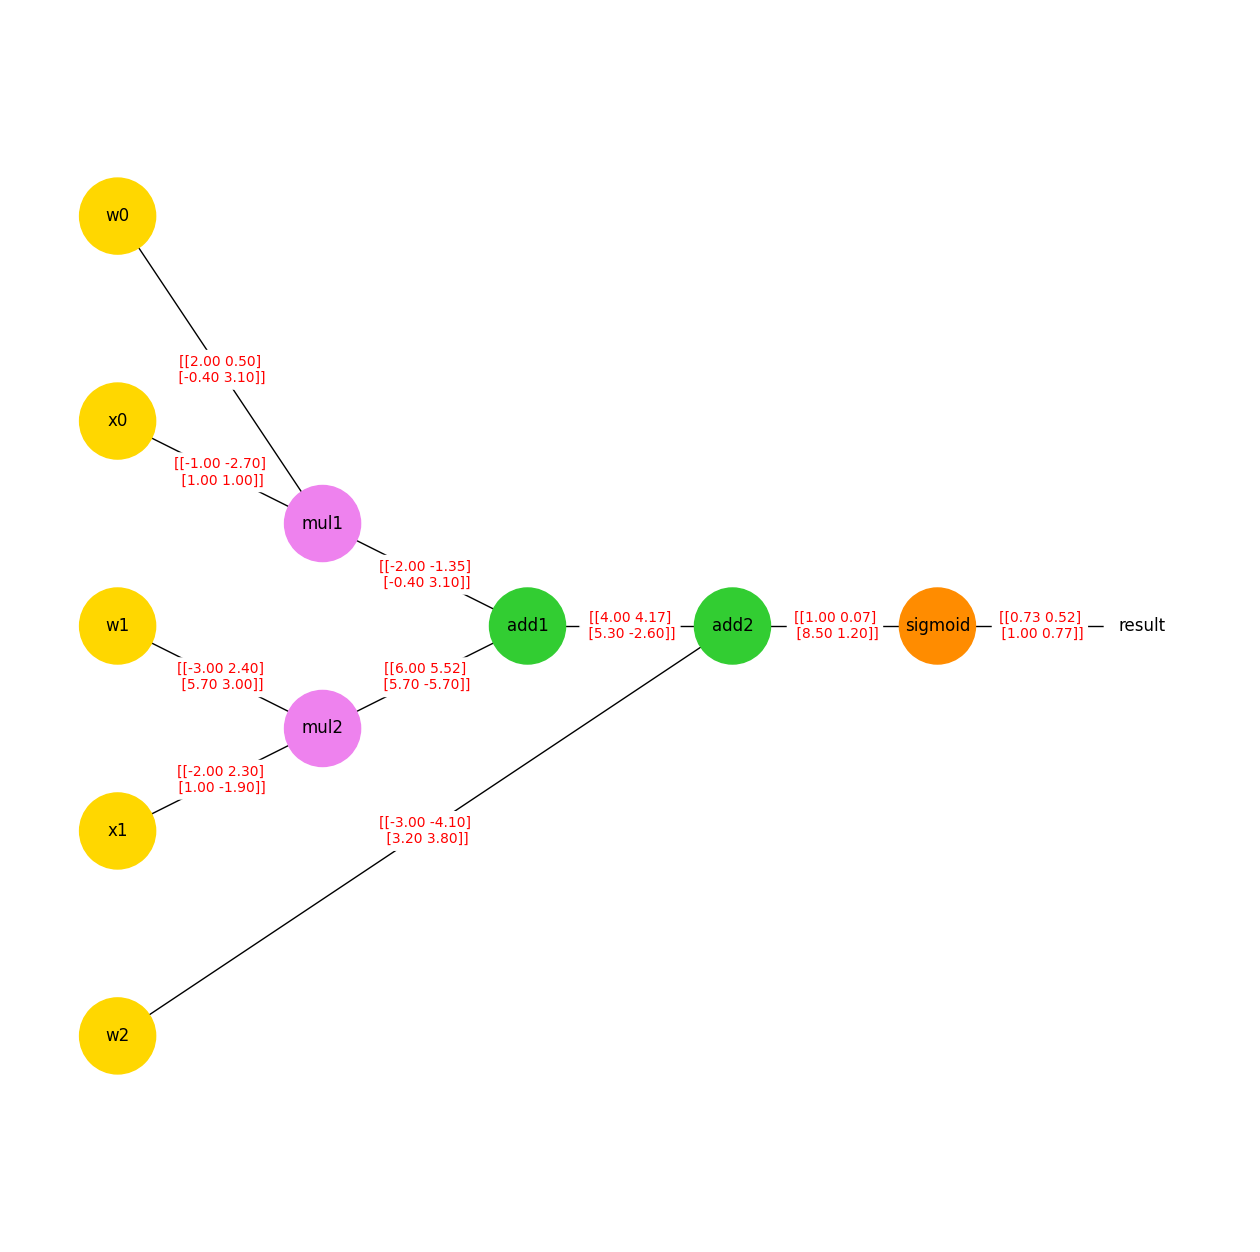

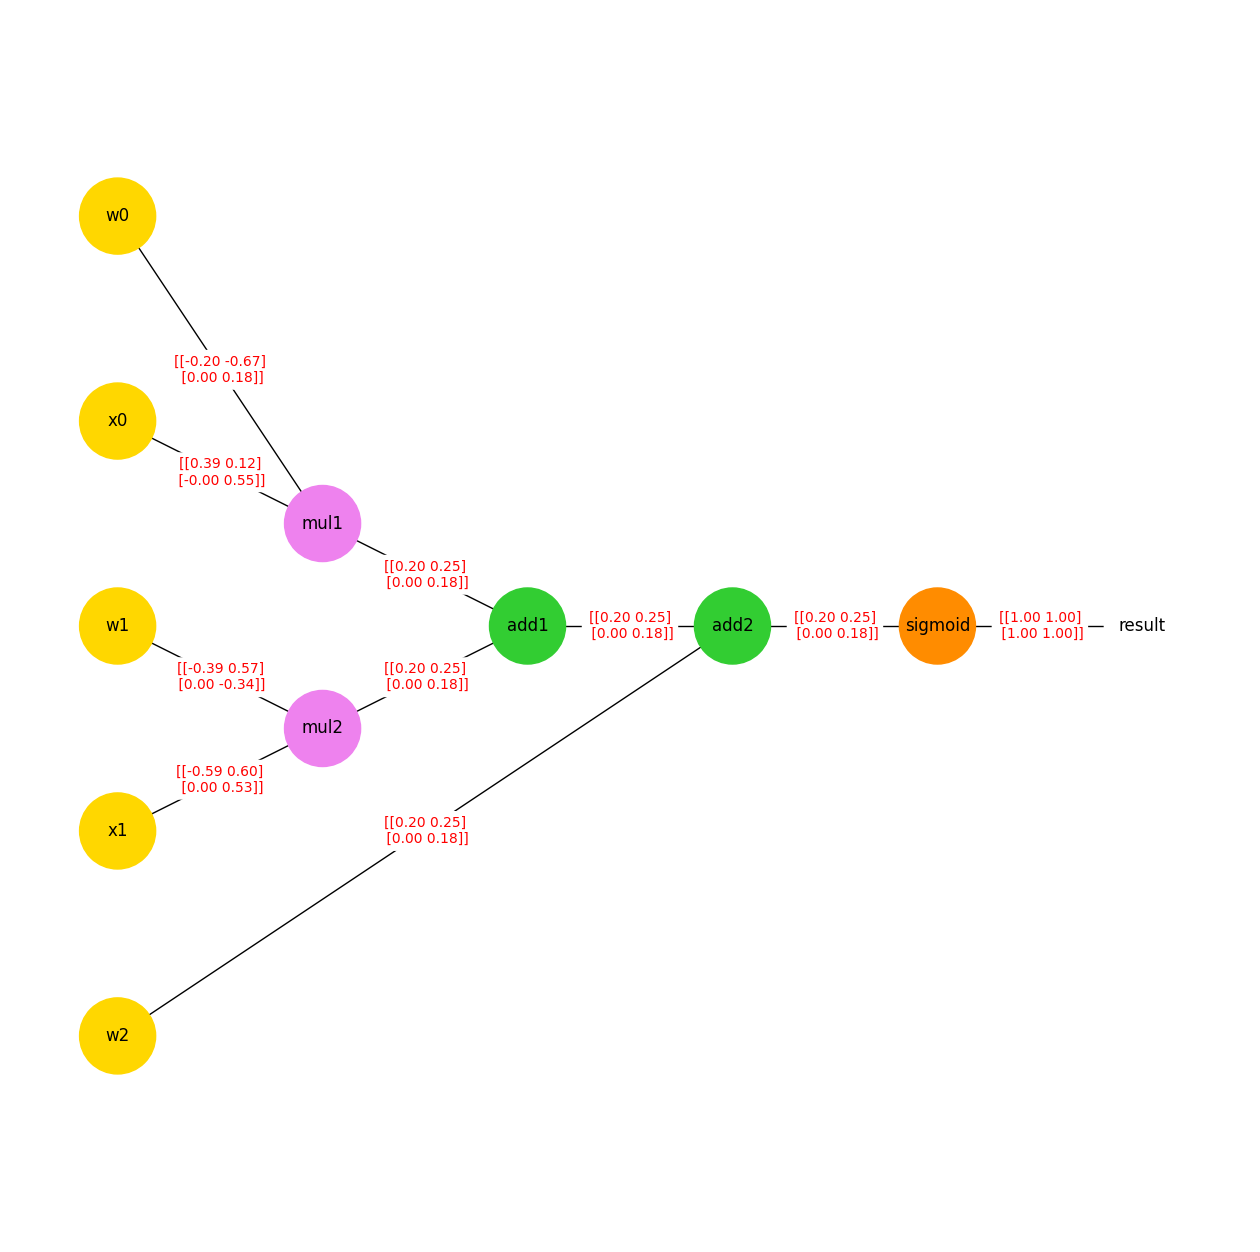

In [5]:
# example of CS231n with sigmoid
import numpy as np
        
class Modular2withS:
    def __init__(self):
        self.w0 = None
        self.x0 = None
        self.w1 = None
        self.x1 = None
        self.w2 = None

        self.sig1 = Sigmoid()
        self.m1 = MulLayer()
        self.m2 = MulLayer()
        self.a1 = AddLayer()
        self.a2 = AddLayer()

    def forward(self, w0, x0, w1, x1, w2):
        self.w0 = w0
        self.x0 = x0
        self.w1 = w1
        self.x1 = x1
        self.w2 = w2

        self.q1 = self.m1.forward(w0, x0)
        self.q2 = self.m2.forward(w1, x1)
        self.p1 = self.a1.forward(self.q1, self.q2)
        self.p2 = self.a2.forward(self.p1, w2)
        y = self.sig1.forward(self.p2)

        self.y = y
        return y
    
    def backward(self):
        dout = self.y / self.y
        self.y = dout
        dy = self.sig1.backward(self.y)
        self.p2 = dy
        self.p1, self.w2 = self.a2.backward(dy)
        self.q1, self.q2 = self.a1.backward(self.p1)
        self.w0, self.x0 = self.m1.backward(self.q1)
        self.w1, self.x1 = self.m2.backward(self.q2)

    def printAllNode(self):
        # Print Every node with pretty style
        %matplotlib inline
        import matplotlib.pyplot as plt
        import networkx as nx

        subset_sizes = [5, 2, 1, 1, 1, 1]
        subset_color = [
            "gold",
            "violet",
            "limegreen",
            "limegreen",
            "darkorange",
            "white"
        ]


        def multilayered_graph(*subset_sizes):
            layers = [['w0', 'x0', 'w1', 'x1', 'w2'], ['mul1', 'mul2'], ['add1'], ['add2'], ['sigmoid'], ['result']]
            G = nx.Graph()
            for i, layer in enumerate(layers):
                G.add_nodes_from(layer, layer=i)
            G.add_edges_from([('w0', 'mul1'), ('x0', 'mul1'), ('w1', 'mul2'), ('x1', 'mul2'), ('mul1', 'add1'), ('mul2', 'add1'), ('add1', 'add2'), ('w2', 'add2'), ('add2', 'sigmoid'), ('sigmoid', 'result')])
            return G


        G = multilayered_graph(*subset_sizes)
        color = [subset_color[data["layer"]] for v, data in G.nodes(data=True)]
        pos = nx.multipartite_layout(G, subset_key="layer")
        plt.figure(figsize=(16, 16))
        nx.draw_networkx_nodes(G, pos=pos, node_size=3000, node_color=color)
        nx.draw(G, pos, node_color=color, with_labels=True)
        nx.draw_networkx_edge_labels(G, pos,
                                     edge_labels={
                                         ('w0', 'mul1'): np.array2string(self.w0, formatter={'float': lambda x: f'{x:.2f}'}),
                                         ('x0', 'mul1'): np.array2string(self.x0, formatter={'float': lambda x: f'{x:.2f}'}),
                                         ('w1', 'mul2'): np.array2string(self.w1, formatter={'float': lambda x: f'{x:.2f}'}),
                                         ('x1', 'mul2'): np.array2string(self.x1, formatter={'float': lambda x: f'{x:.2f}'}),
                                         ('mul1', 'add1'): np.array2string(self.q1, formatter={'float': lambda x: f'{x:.2f}'}),
                                         ('mul2', 'add1'): np.array2string(self.q2, formatter={'float': lambda x: f'{x:.2f}'}),
                                         ('w2', 'add2'): np.array2string(self.w2, formatter={'float': lambda x: f'{x:.2f}'}),
                                         ('add1', 'add2'): np.array2string(self.p1, formatter={'float': lambda x: f'{x:.2f}'}),
                                         ('add2', 'sigmoid'): np.array2string(self.p2, formatter={'float': lambda x: f'{x:.2f}'}),
                                         ('sigmoid', 'result'): np.array2string(self.y, formatter={'float': lambda x: f'{x:.2f}'}),
                                         }, 
                                     font_color='red',
                                     rotate=False)
        plt.axis("equal")
        plt.show()

if __name__ == "__main__":
    m = Modular2withS()
    y = m.forward(np.array([[2.0, 0.5], [-0.4, 3.1]]), np.array([[-1.0, -2.7], [1.0, 1.0]]), np.array([[-3.0, 2.4], [5.7, 3.0]]), np.array([[-2.0, 2.3], [1.0, -1.9]]), np.array([[-3.0, -4.1], [3.2, 3.8]]))
    m.printAllNode()
    uy = m.backward()
    m.printAllNode()

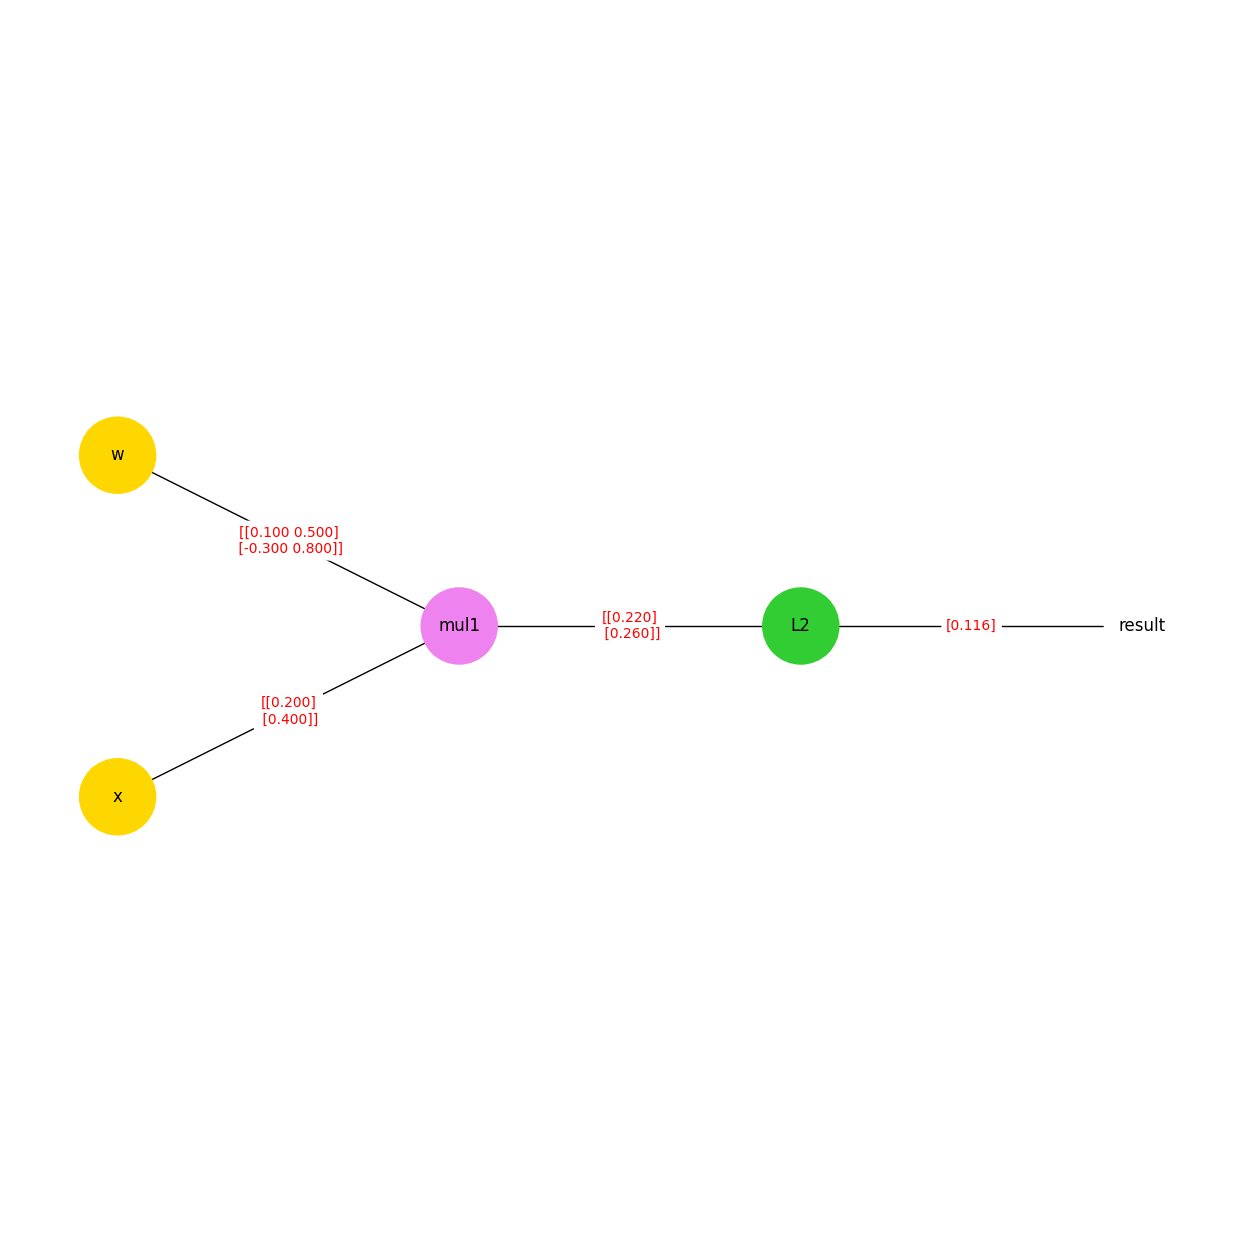

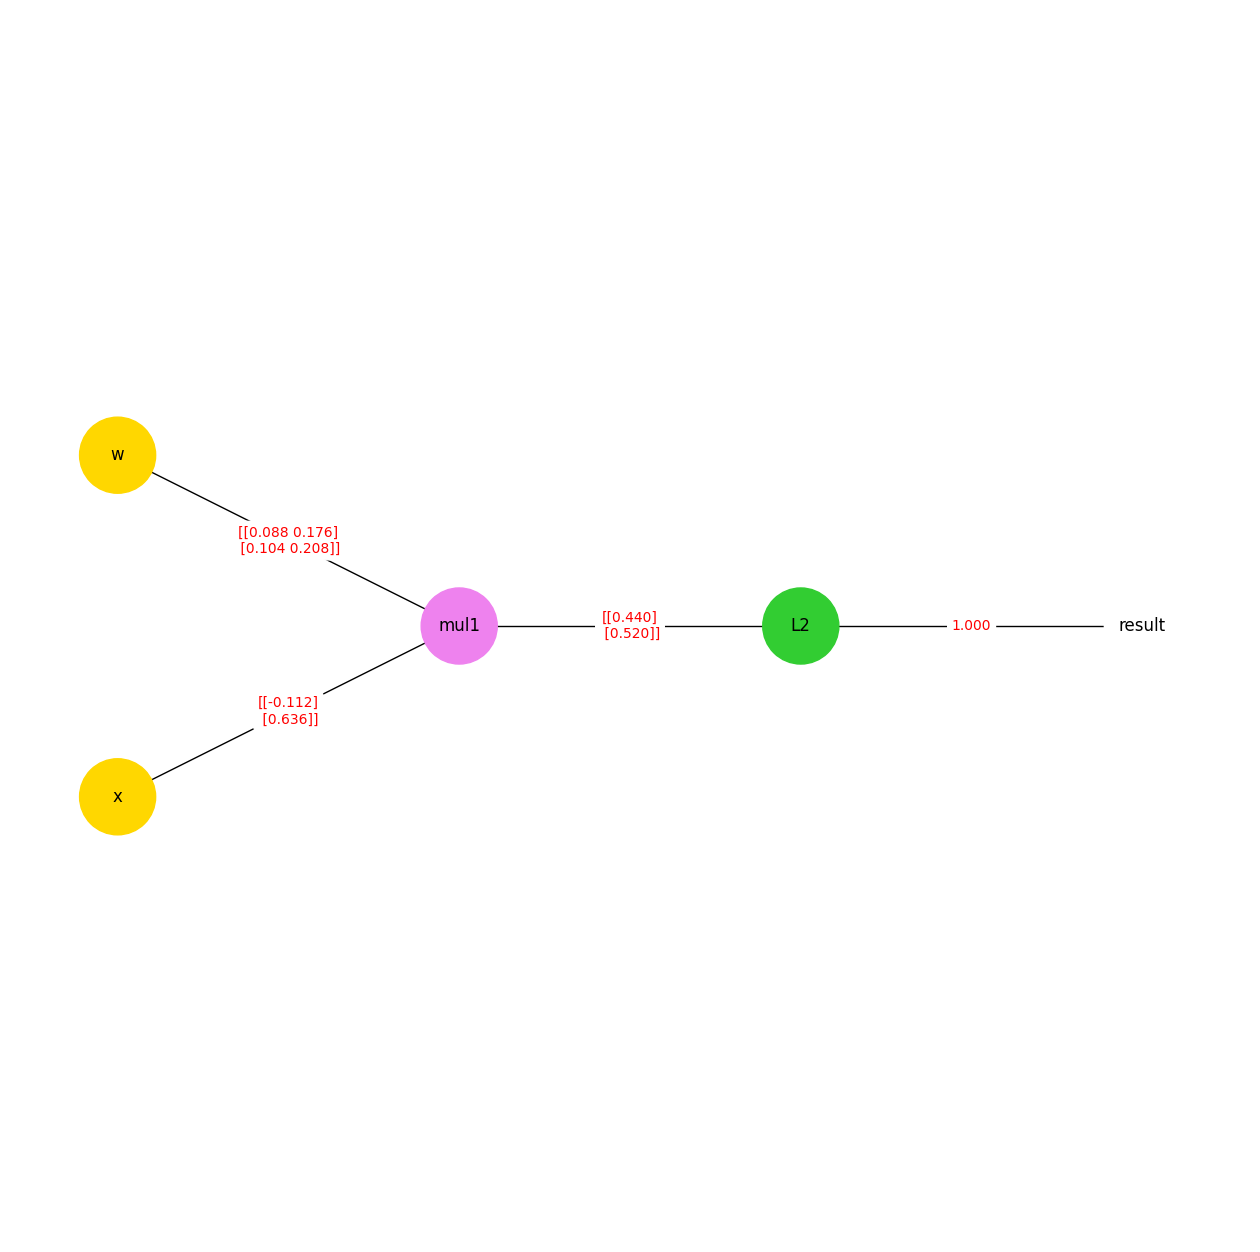

In [6]:
# f(x, W) = ||W * x||^2 = Sum(W*x)^2
import numpy as np

class L2:
    def __init__(self):
        pass

    def forward(self, x):
        self.x = x
        y = 0
        for i in x:
            y += i ** 2
        self.y = y

        return self.y
    
    def backward(self, dy):
        self.dy = dy * 2 * self.x
        return self.dy
    
class MulLayer2:
    def __init__(self) -> None:
        self.x = None
        self.y = None
    
    def forward(self, x, y):
        self.x = x
        self.y = y

        out = x @ y
        return out
    
    def backward(self, dout):
        dx = (dout/2) @ (2*self.y.transpose())
        dy = ((dout.transpose()) @ (self.x)).transpose()

        self.dx = dx
        self.dy = dy

        return self.dx, self.dy

class exercise1:
    def __init__(self):
        self.x = None
        self.w = None
        
        self.mul1 = MulLayer2()
        self.l2 = L2()
    
    def forward(self, x, W):
        self.x = x
        self.w = W

        self.m1 = self.mul1.forward(self.w, self.x)
        self.y = self.l2.forward(self.m1)

        return self.y
    
    def backward(self, dy):
        self.dy = self.l2.backward(dy)
        self.dw, self.dx = self.mul1.backward(self.dy)

        self.w = self.dw
        self.x = self.dx
        self.y = np.array(dy)
        self.m1 = self.dy

        return self.dx, self.dw
    
    def printAllNode(self):
        # Print Every node with pretty style
        %matplotlib inline
        import matplotlib.pyplot as plt
        import networkx as nx

        subset_sizes = [2, 1, 1, 1]
        subset_color = [
            "gold",
            "violet",
            "limegreen",
            "white"
        ]


        def multilayered_graph(*subset_sizes):
            layers = [['w', 'x'], ['mul1'], ['L2'], ['result']]
            G = nx.Graph()
            for i, layer in enumerate(layers):
                G.add_nodes_from(layer, layer=i)
            G.add_edges_from([('w', 'mul1'), ('x', 'mul1'), ('mul1', 'L2'), ('L2', 'result')])
            return G


        G = multilayered_graph(*subset_sizes)
        color = [subset_color[data["layer"]] for v, data in G.nodes(data=True)]
        pos = nx.multipartite_layout(G, subset_key="layer")
        plt.figure(figsize=(16, 16))
        nx.draw_networkx_nodes(G, pos=pos, node_size=3000, node_color=color)
        nx.draw(G, pos, node_color=color, with_labels=True)
        nx.draw_networkx_edge_labels(G, pos,
                                     edge_labels={
                                         ('w', 'mul1'): np.array2string(self.w, formatter={'float': lambda x: f'{x:.3f}'}),
                                         ('x', 'mul1'): np.array2string(self.x, formatter={'float': lambda x: f'{x:.3f}'}),
                                         ('mul1', 'L2'): np.array2string(self.m1, formatter={'float': lambda x: f'{x:.3f}'}),
                                         ('L2', 'result'): np.array2string(self.y, formatter={'float': lambda x: f'{x:.3f}'}),
                                         }, 
                                     font_color='red',
                                     rotate=False)
        plt.axis("equal")
        plt.show()

ex = exercise1()
y = ex.forward(np.array([[0.2], [0.4]]), np.array([[0.1, 0.5], [-0.3, 0.8]]))
ex.printAllNode()
y_hat = ex.backward(1.0)
ex.printAllNode()